In [1]:
import numpy as np
import matplotlib.pyplot as plt
print(plt.style.available)
plt.style.use('seaborn')

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [8]:
sde_name = 'GBM'
option_name = 'Asian'
option_name2 = 'Basket_wo_PI'
dim1 =1
loss = np.loadtxt(f'train_curve/{option_name}_under_{sde_name}_{dim1}train.txt')/10
l = loss[:10000]
print(len(loss))

dim2 = 10
loss2 = np.loadtxt(f'train_curve/{option_name2}_under_{sde_name}_{dim2}train.txt')/10
l2 = loss2[:1000]


10000


0.028487785279945464 0.00296664512058659 0.002776936823477253 0.0025936445397016193 0.0022041864607311697


<Figure size 720x432 with 0 Axes>

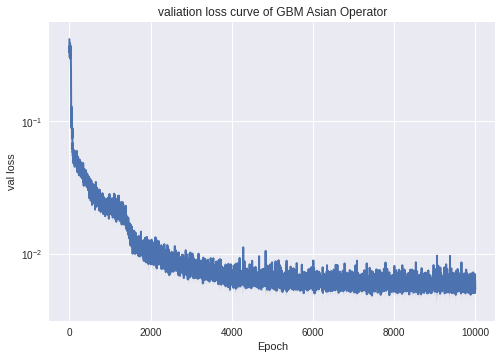

In [9]:
def rolling_window(a, window):
    shape = a.shape[:-1] + (a.shape[-1] - window + 1, window)
    strides = a.strides + (a.strides[-1],)
    return np.lib.stride_tricks.as_strided(a, shape=shape, strides=strides) 
w = 10
sd = np.sqrt(np.var(rolling_window(loss, w), -1))
sd = np.concatenate([sd,np.zeros([w - 1])])
sd = sd[:len(l)]
sd2 = np.sqrt(np.var(rolling_window(loss2, w), -1))
sd2 = np.concatenate([sd,np.zeros([w - 1])])
sd2= sd2[:len(l2)]
print(sd[0], sd[100], sd[200], sd[300], sd[499])

# plt.style.use('_mpl-gallery')
plt.figure(figsize=(10,6))
fig, ax = plt.subplots()
x = np.linspace(1, len(l), len(l))
ax.fill_between(x, l+sd, l-sd, alpha=.6, linewidth=0)
# ax.fill_between(x, l2 + sd2, l2 - sd2, alpha=.6,  linewidth=0)
ax.plot(x, l, linewidth=2)
#ax.plot(x, l2, linewidth=2)
ax.set_yscale('log')
ax.set(xlabel='Epoch',ylabel='val loss',title=f'valiation loss curve of {sde_name} {option_name} Operator')
# ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
#        ylim=(0, 8), yticks=np.arange(1, 8))

plt.show()




<Figure size 720x432 with 0 Axes>

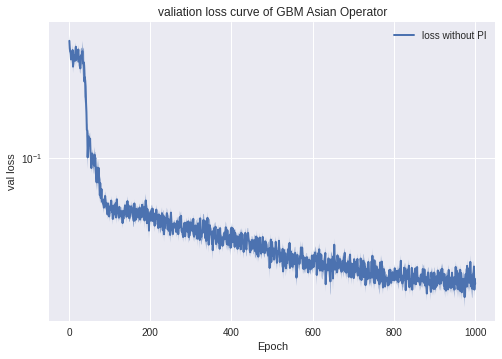

In [5]:
plt.figure(figsize=(10,6))
fig, ax = plt.subplots()
x = np.linspace(1, len(l), len(l))
ax.fill_between(x, l+sd, l-sd, alpha=.6, linewidth=0)
# # ax.fill_between(x, l2 + sd2, l2 - sd2, alpha=.6,  linewidth=0)
ax.plot(x, l, linewidth=2, label='loss Asian')
# ax.plot(x, l2, linewidth=2, label='loss with PI')
ax.legend()
ax.set_yscale('log')
ax.set(xlabel='Epoch',ylabel='val loss',title=f'valiation loss curve of {sde_name} {option_name} Operator')
# ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
#        ylim=(0, 8), yticks=np.arange(1, 8))

plt.show()